In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:
british_airways_data = pd.read_csv('British_Air_Customer_Reviews.csv')

## Task 1: Data Analysis and Preprocessing
**Performing EDA**

In [3]:
british_airways_data.head()

,Unnamed: 0,title,reviews,date,place
0,0,"""no boarding drinks provided""",✅ Trip Verified | First time flying with BA b...,25th June 2023,United Kingdom
1,1,"""WiFi didn't work""",Not Verified | You can buy sandwiches and cris...,24th June 2023,United Kingdom
2,2,"""stick with economy""",✅ Trip Verified | This is a two-for-one revie...,24th June 2023,United Kingdom
3,3,"""Communication is terrible""",✅ Trip Verified | Absolutely horrible airline....,23rd June 2023,United States
4,4,"""delays and cancellations""",✅ Trip Verified | Having experienced delays a...,22nd June 2023,United States


In [4]:
british_airways_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2930 non-null   int64 
 1   title       2930 non-null   object
 2   reviews     2930 non-null   object
 3   date        2930 non-null   object
 4   place       2930 non-null   object
dtypes: int64(1), object(4)
memory usage: 114.6+ KB


In [5]:
# Printing summary statistics
# as we have only one numeric column the unnamed column so it is for that
british_airways_data.describe()

,Unnamed: 0
count,2930.000000
mean,4.500000
std,2.872772
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [11]:
# Check for null values in the british ai customer reviews dataset
null_values = british_airways_data.isnull().sum()

print("Null Values in the british airways data:")
print(null_values)

if null_values.sum() == 0:
    print("There are no null values in the dataset.")
else:
    print("There are null values in the dataset. Please handle them accordingly.")


Null Values in the british airways data:
index_value    0
title          0
reviews        0
date           0
place          0
dtype: int64
There are no null values in the dataset.


<Axes: >

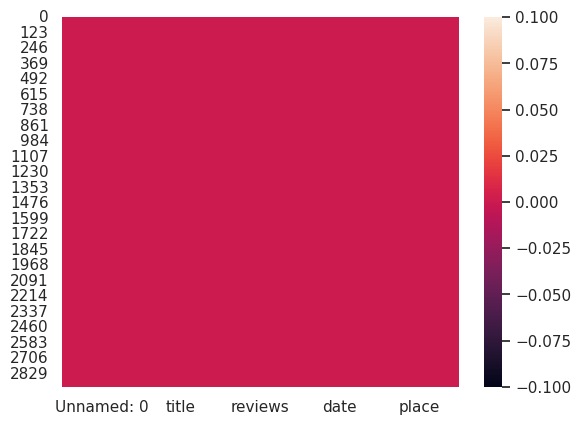

In [6]:
#Plotted heatmap to verify the null values, as we can see that there are no null values in the british dataset
sns.heatmap(british_airways_data.isnull())


In [6]:
#Printing the names of all the columns in the dataset
british_airways_data.columns

Index(['Unnamed: 0', 'title', 'reviews', 'date', 'place'], dtype='object')

In [7]:
# calculating the unique values in the Unnamed column
unique_values = british_airways_data['Unnamed: 0'].unique()
print("Unique Values in the Unnamed Column:", unique_values)


Unique Values in the Unnamed Column: [0 1 2 3 4 5 6 7 8 9]


In [8]:
# checking the frequency distribution of the Unnamed column
fd = british_airways_data['Unnamed: 0'].value_counts()
print("Frequency Distribution:", fd)
# the values are equally distributed

Frequency Distribution: 0    293
1    293
2    293
3    293
4    293
5    293
6    293
7    293
8    293
9    293
Name: Unnamed: 0, dtype: int64


In [9]:
# Replacing 'Unnamed: 0' with the some appropriate name for your column
british_airways_data = british_airways_data.rename(columns={'Unnamed: 0': 'index_value'})

# Check the updated column names
print("\nUpdated Column Names:")
print(british_airways_data.columns)


Updated Column Names:
Index(['index_value', 'title', 'reviews', 'date', 'place'], dtype='object')


Text(0.5, 0.98, 'Counts for each index')

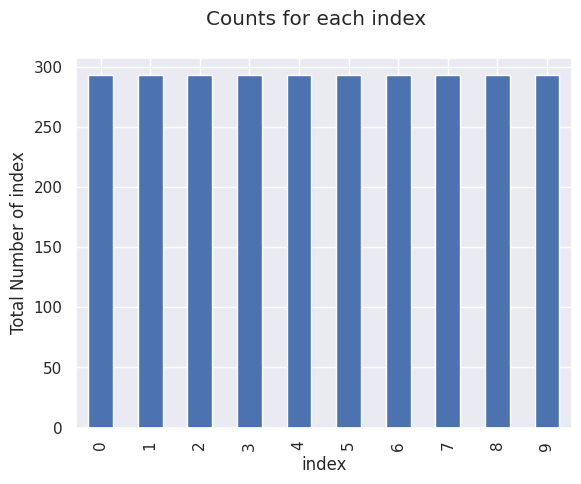

In [10]:
#Plotting the equaly distributed data of the unnamed column in the dataset
british_airways_data.index_value.value_counts().plot(kind="bar")
plt.xlabel("index")
plt.ylabel("Total Number of index")
plt.suptitle("Counts for each index")


**I plan to keep this because this might use as an index to check all the values at each index for example : if we want to check the corresponding reviews with value 5 : so it might be useful in that sense**

#  Variable : Place

In [13]:
# frequecny/count of each place
place_count = british_airways_data['place'].value_counts(dropna = False)
place_count

United Kingdom           1826
United States             332
Australia                 113
Canada                     92
Germany                    54
                         ... 
Costa Rica                  1
Cayman Islands              1
Panama                      1
Saint Kitts and Nevis       1
Ukraine                     1
Name: place, Length: 67, dtype: int64

In [14]:
# Unique percenatge of each place
place_percentage = british_airways_data['place'].value_counts(normalize=True) * 100
print("Unique Percentage for  each 'place':")
print(place_percentage)


Unique Percentage for  each 'place':
United Kingdom           62.320819
United States            11.331058
Australia                 3.856655
Canada                    3.139932
Germany                   1.843003
                           ...    
Costa Rica                0.034130
Cayman Islands            0.034130
Panama                    0.034130
Saint Kitts and Nevis     0.034130
Ukraine                   0.034130
Name: place, Length: 67, dtype: float64


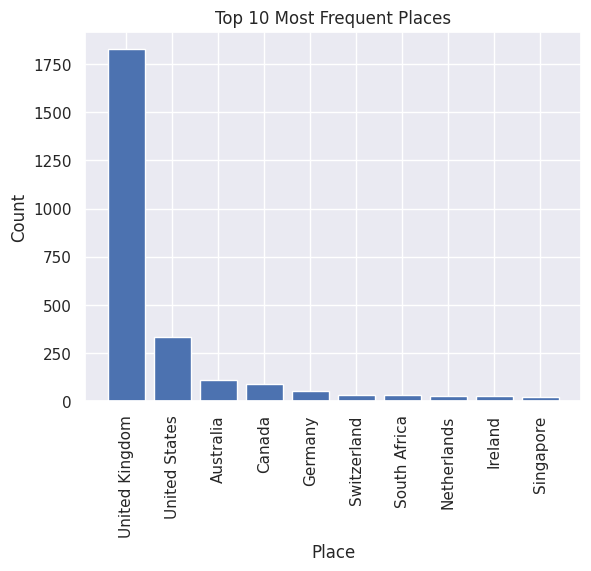

In [15]:
# Here is the plot for the Top 10 places United Kindom being the TOP amongst all
N = 10
top_n_values = place_count.head(N)

plt.bar(top_n_values.index, top_n_values.values)
plt.xlabel('Place')
plt.ylabel('Count')
plt.title(f'Top {N} Most Frequent Places')
plt.xticks(rotation=90)
plt.show()


In [16]:
# Least occurred place
least_occurred_place = place_count.idxmin()
least_occurred_count = place_count.min()
print("Least Occurred Place:", least_occurred_place)
print("Count:", least_occurred_count)

# Highest occurred place
highest_occurred_place = place_count.idxmax()
highest_occurred_count = place_count.max()
print("\nHighest Occurred Place:", highest_occurred_place)
print("Count:", highest_occurred_count)

Least Occurred Place: Jordan
Count: 1

Highest Occurred Place: United Kingdom
Count: 1826


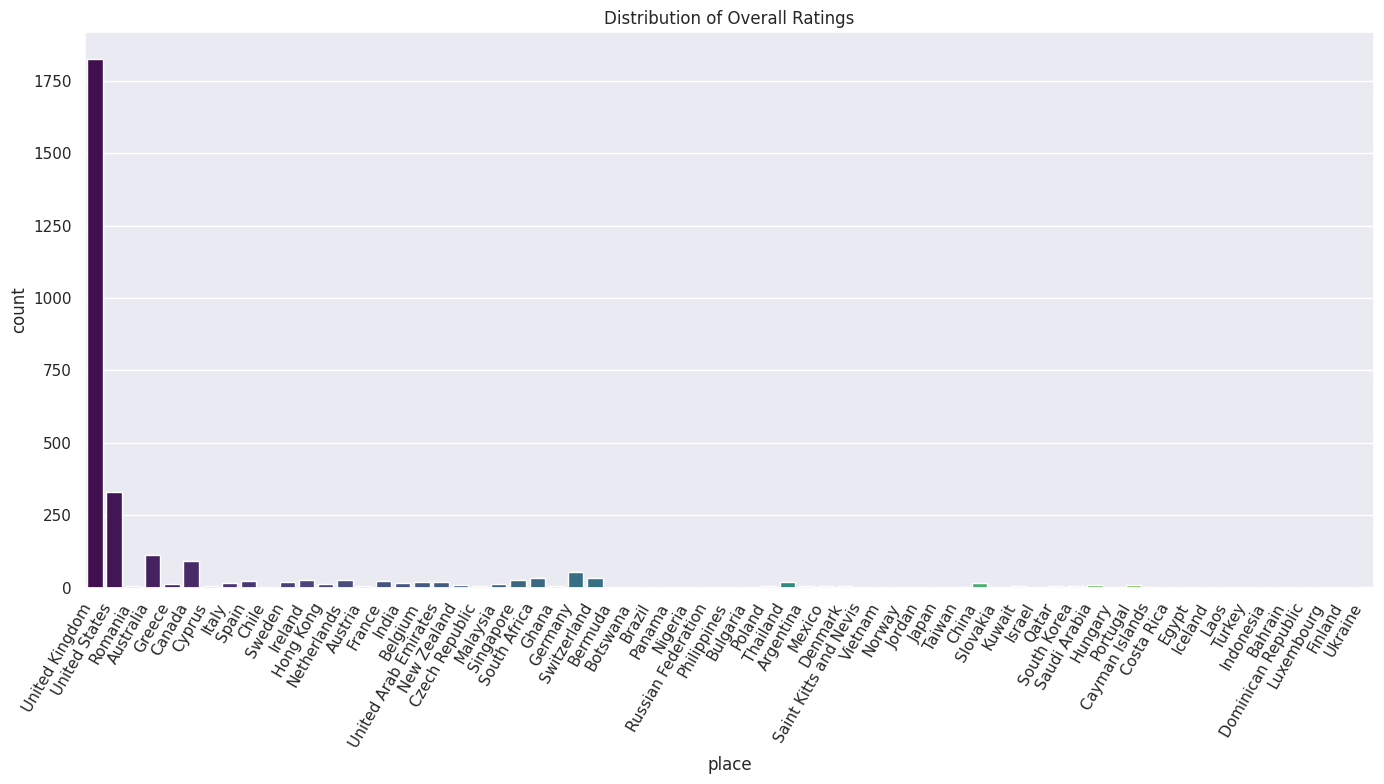

In [17]:
#Overall place Distribution
plt.figure(figsize=(14, 8))
sns.countplot(x='place', data=british_airways_data, palette="viridis")
plt.title('Distribution of Overall Ratings')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

# As we can see it is british air cutomer reviews , united kindom(1826) is the most frequent place and ukraine being the least occured as per the plot But as per the whole data Jordan is the least as it occured only once

# Variable : date

In [6]:
# counted the frquency of each date
date_counts = british_airways_data['date'].value_counts().sort_index()
date_counts

10th April 2017       2
10th April 2018       1
10th April 2019       1
10th April 2023       1
10th August 2015      1
                     ..
9th October 2017      2
9th October 2019      4
9th September 2015    2
9th September 2017    4
9th September 2021    1
Name: date, Length: 1615, dtype: int64

In [7]:
# Convert 'date' column to datetime and printing the oldest and the newest date
british_airways_data['date'] = pd.to_datetime(british_airways_data['date'], errors='coerce')

oldest_date = british_airways_data['date'].min()
newest_date = british_airways_data['date'].max()

print("Oldest Date:", oldest_date)
print("Newest Date:", newest_date)


Oldest Date: 2015-04-14 00:00:00
Newest Date: 2023-06-25 00:00:00


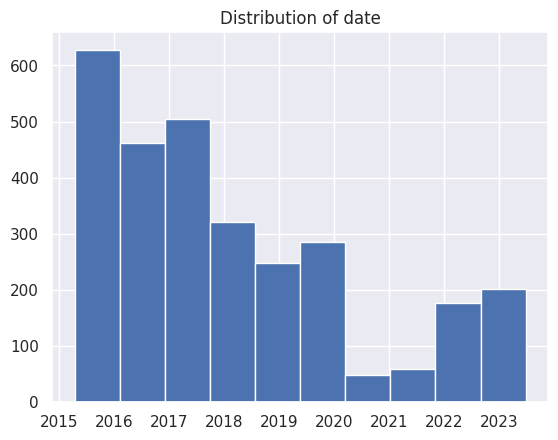

In [8]:
#Distribution of the date :
british_airways_data['date'].hist()
plt.title('Distribution of date')
plt.show()

<ipython-input-12-4205bdb250d2>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


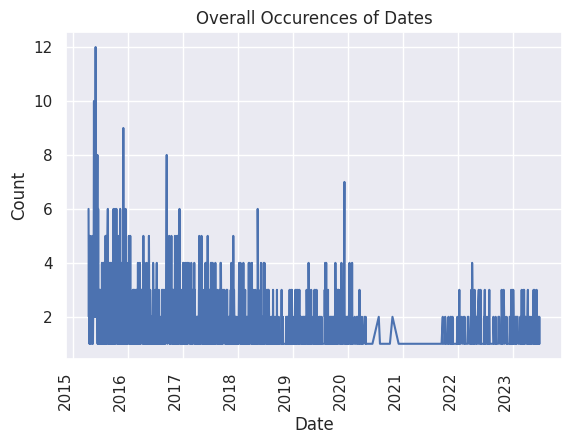

In [12]:
#Plotted the occurence of the dates
date_counts = british_airways_data['date'].value_counts().sort_index()
ax = date_counts.plot(kind = 'line')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Overall Occurences of Dates')
plt.show()

In [13]:
# most frequently occured date
most_common_date = british_airways_data['date'].mode().iloc[0]
print(f"The date that occurred most frequently is: {most_common_date}")

The date that occurred most frequently is: 2015-05-31 00:00:00


<ipython-input-14-d775824bf57b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


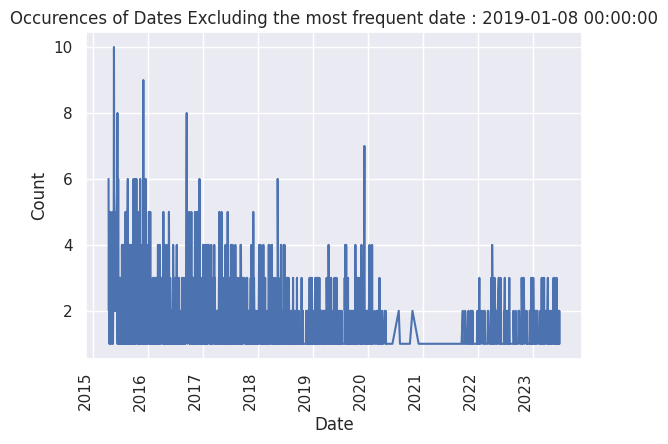

In [14]:
# exluding the most frequent date from the data and checking if there is any chane in the distribution of occurence of dates
#after excluding the most frequent date
exclude_date = '2015-05-31 00:00:00'
filtered_date = british_airways_data[british_airways_data['date'] != exclude_date]
date_countss = filtered_date['date'].value_counts().sort_index()
ax = date_countss.plot(kind = 'line')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Occurences of Dates Excluding the most frequent date : 2019-01-08 00:00:00')

plt.show()
# not much difference, almost the same trend

In [15]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

# Variable Reviews

In [16]:
# Tried removing punctuation and stopword and checked the wordcount to see if it is working
from string import punctuation
from nltk.corpus import stopwords

reviews_without_punct = [' '.join([word for word in review.split() if word not in punctuation]) for review in british_airways_data['reviews']]

stop_words = set(stopwords.words('english'))
reviews_without_sw = [' '.join([word for word in review.split() if word.lower() not in stop_words]) for review in reviews_without_punct]

# Counting the number of words before and after cleaning
original_word_count = sum(len(review.split()) for review in british_airways_data['reviews'])
cleaned_word_count = sum(len(review.split()) for review in reviews_without_sw)

print("Original Word Count:", original_word_count)
print("Cleaned Word Count:", cleaned_word_count)

# It is working: as from the output it is clearly visible that the cleanded word count is less in comparison to the orginal word count

Original Word Count: 487796
Cleaned Word Count: 263838


In [17]:
# this is how review looked before cleaning
print(british_airways_data['reviews'])

0       ✅ Trip Verified |  First time flying with BA b...
1       Not Verified | You can buy sandwiches and cris...
2       ✅ Trip Verified |  This is a two-for-one revie...
3       ✅ Trip Verified | Absolutely horrible airline....
4       ✅ Trip Verified |  Having experienced delays a...
                              ...                        
2925    BA0676 IST-LHR Boeing 767. Euro Traveller cabi...
2926    While I booked with BA I at first did not real...
2927    BA 208 MIA-LHR in Club. Leg four of a seven le...
2928    British Airways could not care less when they ...
2929    Travelled by Airbus 319 to Lyon and back to He...
Name: reviews, Length: 2930, dtype: object


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Initialized stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove special characters and digits # this to remove specail symbols : usiging regx (regular expressions)
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Converted to lowercase
    text = text.lower()
    # Tokenized the text
    tokens = nltk.word_tokenize(text)
    # finally removing the stopwords and perform lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

# Apply the cleaning function to the reviews
british_airways_data['cleaned_reviews'] = british_airways_data['reviews'].apply(clean_text)

# Display the first few rows of the dataset to verify the cleaning
british_airways_data[['reviews', 'cleaned_reviews']].head()


,reviews,cleaned_reviews
0,✅ Trip Verified | First time flying with BA b...,trip verified first time flying ba business cl...
1,Not Verified | You can buy sandwiches and cris...,verified buy sandwich crisp dont expect hot me...
2,✅ Trip Verified | This is a two-for-one revie...,trip verified twoforone review covering econom...
3,✅ Trip Verified | Absolutely horrible airline....,trip verified absolutely horrible airline comm...
4,✅ Trip Verified | Having experienced delays a...,trip verified experienced delay cancellation d...


In [19]:
# veiwing the dataset after cleaning the reviews and adding them as a seperate column in the dataset
british_airways_data.head()

,Unnamed: 0,title,reviews,date,place,cleaned_reviews
0,0,"""no boarding drinks provided""",✅ Trip Verified | First time flying with BA b...,2023-06-25,United Kingdom,trip verified first time flying ba business cl...
1,1,"""WiFi didn't work""",Not Verified | You can buy sandwiches and cris...,2023-06-24,United Kingdom,verified buy sandwich crisp dont expect hot me...
2,2,"""stick with economy""",✅ Trip Verified | This is a two-for-one revie...,2023-06-24,United Kingdom,trip verified twoforone review covering econom...
3,3,"""Communication is terrible""",✅ Trip Verified | Absolutely horrible airline....,2023-06-23,United States,trip verified absolutely horrible airline comm...
4,4,"""delays and cancellations""",✅ Trip Verified | Having experienced delays a...,2023-06-22,United States,trip verified experienced delay cancellation d...


In [13]:
from wordcloud import WordCloud

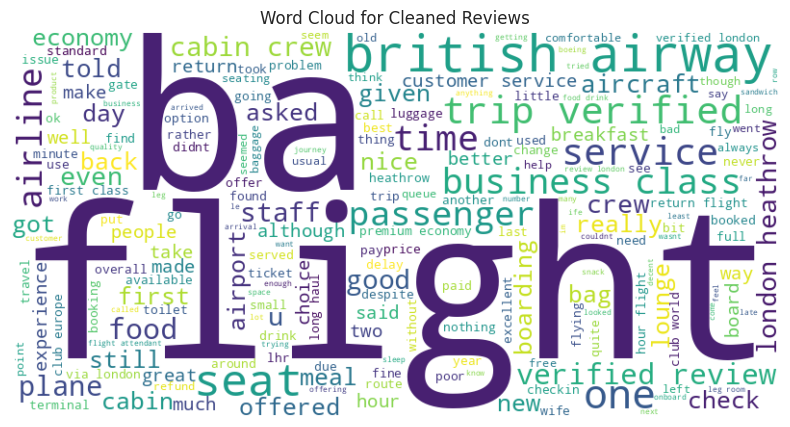

In [14]:
# wordcloud of cleaned reviews
review_data = ' '.join(british_airways_data['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(review_data)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cleaned Reviews')
plt.show()


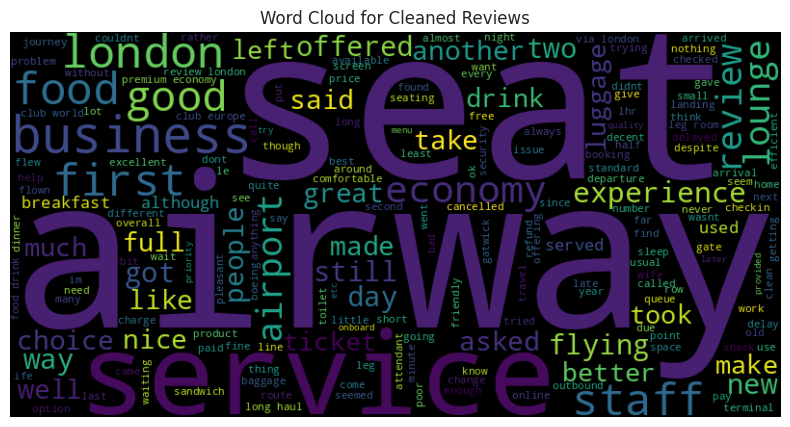

In [15]:
# worldcloud after removing some more stopwords
from nltk.corpus import stopwords
review_data = ' '.join(british_airways_data['cleaned_reviews'])

stopwords = set(stopwords.words('english'))
stopwords.update(["BA","ba", "Heathrow", "meal","customer","flight", "verified", "airline", "would", "check", "british", "Airways", "n't", "Trip",
                         "given", "return", "book", "go", "one", "class", "board", "offer", "time", "get", "However", "Cabin", "could", "passenger",
                         "crew", "hour","even","''","plane","’","aircraft", "back", "told","'s","'" "Review","also", "fly", "bag", "booked", "u", "really", "boarding"])

wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='black', stopwords=stopwords).generate(review_data)

# Display the WordCloud using matplotlib
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cleaned Reviews')
plt.show()


In [16]:
# calculating the frequency of some of the most common 40 words in the cleaned reviews:
from nltk.probability import FreqDist
from nltk.corpus import stopwords

review_data = ' '.join(british_airways_data['cleaned_reviews'])

stopwords = set(stopwords.words('english'))
stopwords.update(["BA","ba", "Heathrow", "heathrow","london","meal","customer","flight", "verified", "airline", "would", "check", "british", "Airways", "n't", "Trip",
                         "given", "return", "book", "go", "one", "class", "board", "offer", "time", "get", "However", "Cabin", "could", "passenger",
                         "crew","airways","hour","2","even","''","``","plane","’","aircraft", "back", "told","'s","'" "Review","also", "fly", "bag", "booked", "u", "really", "boarding"])


# Calculate the frequency of words using FreqDist function
common_review_words = FreqDist(word.lower() for word in review_data.split() if word.lower() not in stopwords)

# Display the most frequent words (top 40)
review_commonwords_count_dict =(pd.Series(dict(common_review_words.most_common(40))))
review_commonwords_count_dict

seat           3503
service        2417
airway         1986
food           1812
cabin          1614
good           1553
trip           1476
business       1277
staff          1267
economy        1147
first          1017
drink           945
review          920
lounge          865
club            784
experience      775
day             710
new             686
minute          662
like            618
airport         588
long            572
year            568
well            565
premium         564
way             540
better          537
got             525
offered         525
two             519
served          518
flying          516
choice          515
leg             513
much            509
comfortable     504
poor            502
great           484
friendly        484
made            481
dtype: int64

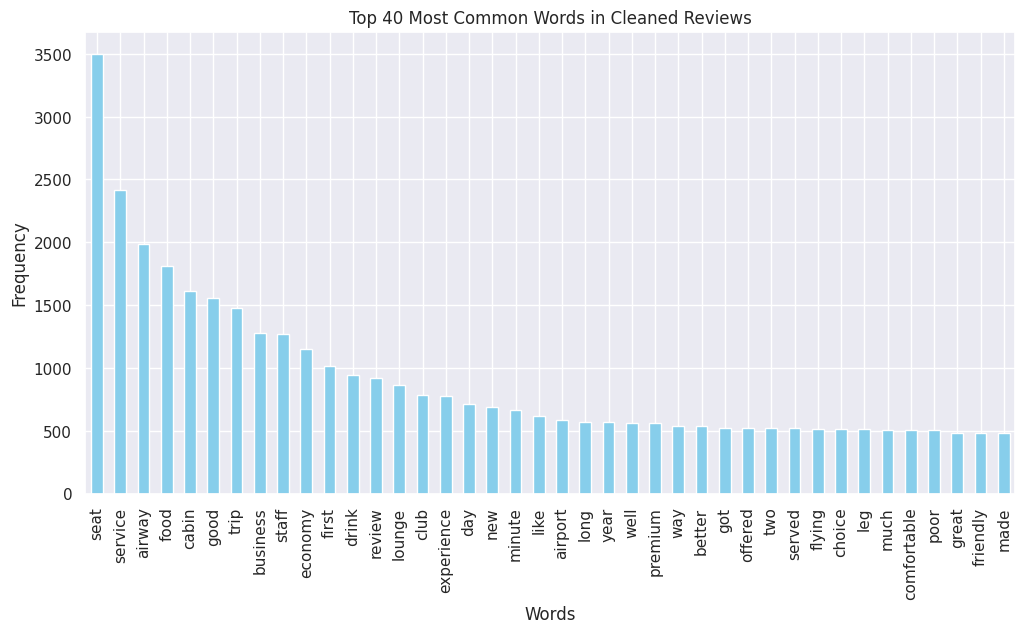

In [17]:
# Plot for Top 40 Most Common Words
plt.figure(figsize=(12, 6))
review_commonwords_count_dict.plot(kind='bar', color='skyblue')
plt.title('Top 40 Most Common Words in Cleaned Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

**It tells us of what customers think or talk about when they book a flight or review the services / give feebacks: At the top we can see it is seat then the service provided to them , food , their overall expiernce , stass and things like that This gives us a glimpse of what customers are really talking about here.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'airway'),
  Text(3, 0, 'food'),
  Text(4, 0, 'cabin'),
  Text(5, 0, 'good'),
  Text(6, 0, 'trip'),
  Text(7, 0, 'business'),
  Text(8, 0, 'staff'),
  Text(9, 0, 'economy'),
  Text(10, 0, 'first'),
  Text(11, 0, 'drink'),
  Text(12, 0, 'review'),
  Text(13, 0, 'lounge'),
  Text(14, 0, 'club'),
  Text(15, 0, 'experience'),
  Text(16, 0, 'day'),
  Text(17, 0, 'new'),
  Text(18, 0, 'minute'),
  Text(19, 0, 'like'),
  Text(20, 0, 'airport'),
  Text(21, 0, 'long'),
  Text(22, 0, 'year'),
  Text(23, 0, 'well'),
  Text(24, 0, 'premium'),
  Text(25, 0, 'way'),
  Text(26, 0, 'better'),
  Text(27, 0, 'got'),
  Text(28, 0, 'offered'),
  Text(29, 0, 'two'),
  Text(30, 0, 'served'),
  Text(31, 0, 'flying'),
  Text(32, 0, 'choice'),
  Text(33, 0, 'leg'),
  T

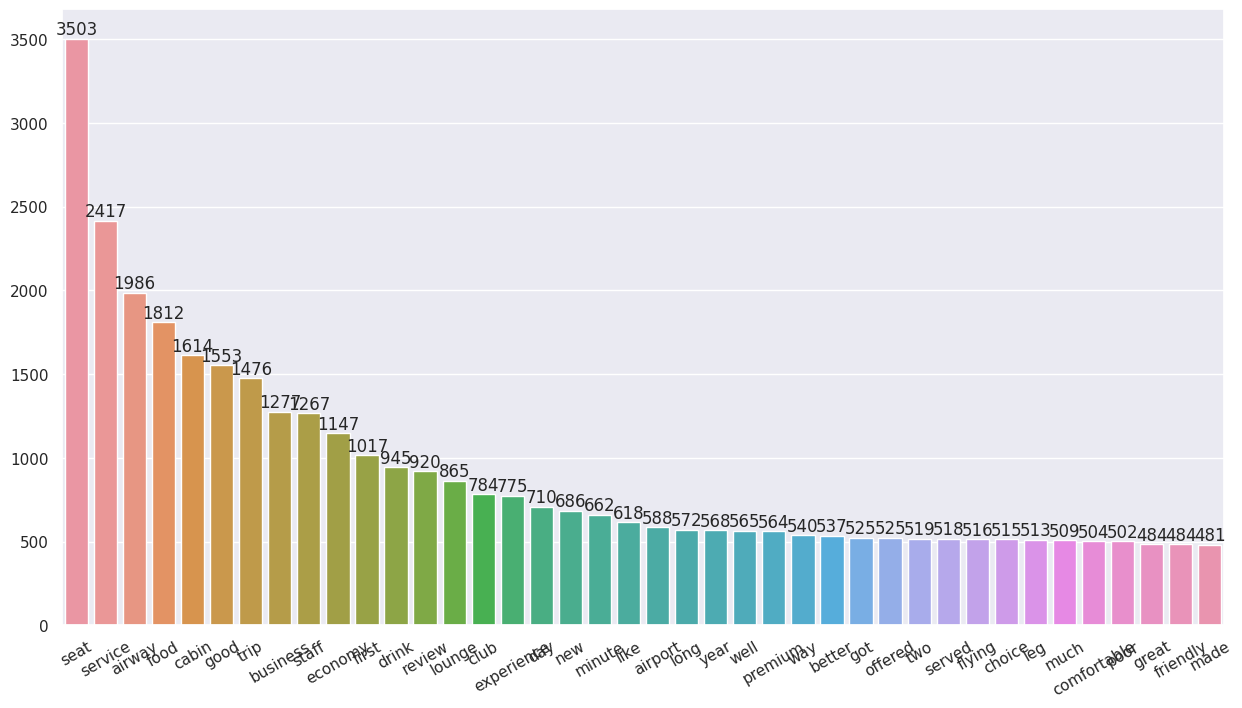

In [18]:
fig, ax = plt.subplots(figsize=(15,8))

#Plotting the insex along with word and the frequecny of the each word
all_plot = sns.barplot(x=review_commonwords_count_dict.index, y=review_commonwords_count_dict.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

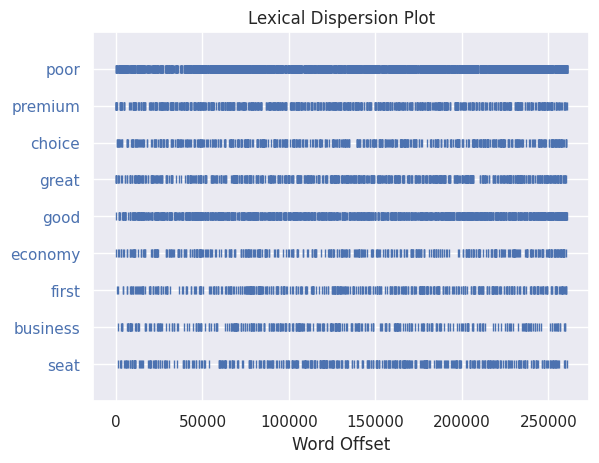

In [16]:
from nltk import Text

cleaned_text = ' '.join(british_airways_data['cleaned_reviews'])

# Tokenize the cleaned text
cleaned_tokens = nltk.word_tokenize(cleaned_text)

# Create an NLTK Text object by passing cleaned_tokens as argument in Text function
cleaned_text_nltk = Text(cleaned_tokens)

# using cleaned_text_nltk object to call dispersion_plot function
cleaned_text_nltk.dispersion_plot(['seat', 'business', 'first', 'economy', 'good', 'great','choice','premium','poor'])

#the dispersion of words like 'seat', 'review', 'first', 'good', and 'staff' in the preprocessed reviews of British Airways.
#By examining the plot, we can gain a visual understanding of how these words are distributed throughout the text,
#potentially identifying patterns or insights related to customer reviews about seats, reviews, service quality, and more.

# Task 2: Sentiment Analysis

# For sentimental analysis I tried few NLP models and textblob as well:
**NLP models i used :**
**1) bert-base-uncased : gives mostly netural result and in labels we have to convert lables to positive, negative and neutral**
**2) distilbert-base-uncased-finetuned-sst-2-english : gives postivie , negative by defualt as output**
**3) nlptown/bert-base-multilingual-uncased-sentiment: it gives output as rating 1 start, 2 star, 3 start... 5star**


####The polarity of a word can be quantified on a numerical scale. In the case of TextBlob, which is a Python library for processing textual data, the polarity values range from -1 to 1:

####Negative polarity: Values less than 0 indicate a negative sentiment.
####Neutral polarity: A value of 0 indicates a neutral sentiment.
####Positive polarity: Values greater than 0 indicate a positive sentiment.
####When you analyze a piece of text using TextBlob for sentiment analysis, it calculates the overall sentiment polarity by considering the individual polarities of the words in the text. The more positive the words, the higher the positive polarity score, and vice versa for negative polarity.

In [19]:
#TextBlob uses simpler methods for determining sentiment, primarily based on the polarity of words in the text
from textblob import TextBlob

# defined a function to analyze sentiment as we will get the polarity value and we will categorize them into postive , negative or neutral
def analyze_sentiment(text):
    # Using TextBlob to get polarity
    polarity = TextBlob(text).sentiment.polarity
    # Categorizing as positive, negative, or neutral based on polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the cleaned reviews
british_airways_data['sentiment'] = british_airways_data['cleaned_reviews'].apply(analyze_sentiment)

british_airways_data[['cleaned_reviews', 'sentiment']].head()


,cleaned_reviews,sentiment
0,trip verified first time flying ba business cl...,Positive
1,verified buy sandwich crisp dont expect hot me...,Positive
2,trip verified twoforone review covering econom...,Positive
3,trip verified absolutely horrible airline comm...,Negative
4,trip verified experienced delay cancellation d...,Positive


In [20]:
sentiment_distribution = british_airways_data['sentiment'].value_counts()

#Distribution os sentiment
print(sentiment_distribution)
# it is visbile the mostly the cleaned_reviews has postive sentiment , some negative and very less neutral sentiments

Positive    2037
Negative     873
Neutral       20
Name: sentiment, dtype: int64


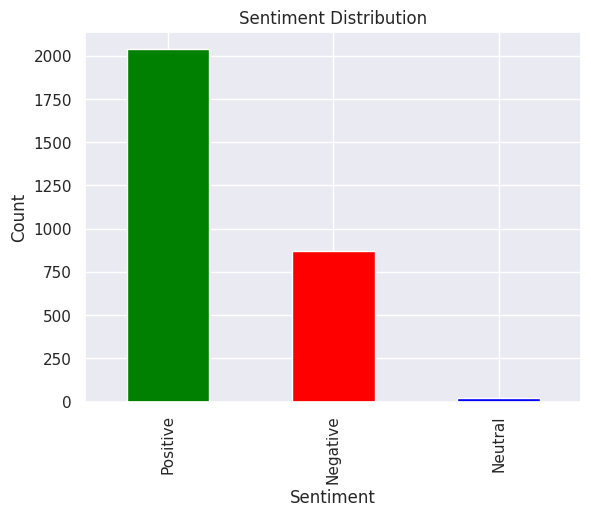

In [23]:
import matplotlib.pyplot as plt

# Ploted the distribution of each sentiment
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
# for positive it is above 2000
# for negative it is above 750
# for neutral we can see it is less than 50

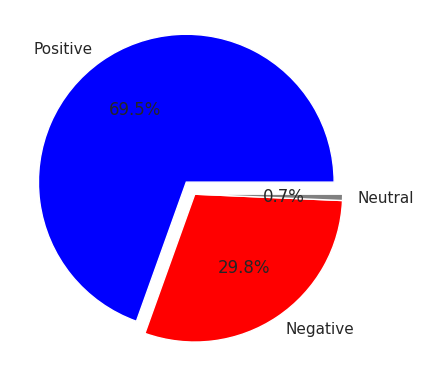

In [21]:
# Pie chart for the percentage of each type of sentiment score
sentiment_type_percentages = british_airways_data['sentiment'].value_counts(normalize=True) * 100

fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index,
    colors=['blue', 'red', 'grey'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
    )

plt.show()

# sentiment analysis using pre-defined NLP model

In [26]:
# 'bert-base-uncased' tried this model , not so good with sentimental analysis , labels the data as label_0 and label_1 ,
#encoded it to positive negative by defing a function map_sentiment but in the output mostly got neurtal only
from transformers import pipeline

# Load the sentiment analysis pipeline using BERT
nlp = pipeline("sentiment-analysis", model="bert-base-uncased")

# Function to map model output to human-readable labels
def map_sentiment(label):
    if label == 'LABEL_0':
        return 'Negative'
    elif label == 'LABEL_1':
        return 'Neutral'
    else:
        return 'Positive'

sentiments = []
for review in british_airways_data['cleaned_reviews']:
    result = nlp(review)[0]
    sentiment = map_sentiment(result['label'])
    sentiments.append(sentiment)

# Add the sentiment_data to the DataFrame
british_airways_data['sentiment_data'] = sentiments

# Display the first few rows with sentiment
print(british_airways_data[['cleaned_reviews', 'sentiment_data']].head())


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                                     cleaned_reviews sentiment_data
0  trip verified first time flying ba business cl...        Neutral
1  verified buy sandwich crisp dont expect hot me...        Neutral
2  trip verified twoforone review covering econom...        Neutral
3  trip verified absolutely horrible airline comm...        Neutral
4  trip verified experienced delay cancellation d...        Neutral


In [32]:
# distribution/count of each sentiment in the sentiment_data
print(british_airways_data['sentiment_data'].value_counts())

Neutral     2929
Negative       1
Name: sentiment_data, dtype: int64


In [ ]:
 #the NLP model : nlptown/bert-base-multilingual-uncased-sentiment model is a multilingual BERT model fine-tuned for sentiment analysis.
 #If you're using this model for sentiment analysis tasks,
 # Types of labels with this one 'nlptown/bert-base-multilingual-uncased-sentiment' :
 #** 1 start, 2,star... 5star ratings **


In [20]:
from transformers import pipeline
from sklearn.model_selection import train_test_split

# model for sentimental analysis:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
sentiment_analyzer = pipeline("sentiment-analysis", model=model_name)

reviews_data = british_airways_data['cleaned_reviews']

# Predict sentiments for the entire dataset
predicted_sentiments = reviews_data.apply(lambda cleaned_review: sentiment_analyzer(cleaned_review)[0]['label'])

X_train, X_test, y_train, y_test = train_test_split(reviews_data, predicted_sentiments, test_size=0.2, random_state=42)



config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [22]:
# printing the output of the : predicted_sentiments
print(predicted_sentiments.sample(10))

1360    4 stars
2872    5 stars
1116    3 stars
315      1 star
2095     1 star
1412     1 star
2143    5 stars
2221     1 star
2843    3 stars
1975    3 stars
Name: cleaned_reviews, dtype: object


In [23]:
# Added predicted_sentiments to the dataframe
british_airways_data['predicted_sentiments'] = predicted_sentiments
british_airways_data.head()

,Unnamed: 0,title,reviews,date,place,cleaned_reviews,predicted_sentiments
0,0,"""no boarding drinks provided""",✅ Trip Verified | First time flying with BA b...,2023-06-25,United Kingdom,trip verified first time flying ba business cl...,1 star
1,1,"""WiFi didn't work""",Not Verified | You can buy sandwiches and cris...,2023-06-24,United Kingdom,verified buy sandwich crisp dont expect hot me...,1 star
2,2,"""stick with economy""",✅ Trip Verified | This is a two-for-one revie...,2023-06-24,United Kingdom,trip verified twoforone review covering econom...,3 stars
3,3,"""Communication is terrible""",✅ Trip Verified | Absolutely horrible airline....,2023-06-23,United States,trip verified absolutely horrible airline comm...,1 star
4,4,"""delays and cancellations""",✅ Trip Verified | Having experienced delays a...,2023-06-22,United States,trip verified experienced delay cancellation d...,1 star


In [24]:
# count for predicted_sentiments
sentiment_distribution = british_airways_data['predicted_sentiments'].value_counts()

# Display the distribution
print(sentiment_distribution)


1 star     1656
3 stars     425
2 stars     390
4 stars     304
5 stars     155
Name: predicted_sentiments, dtype: int64


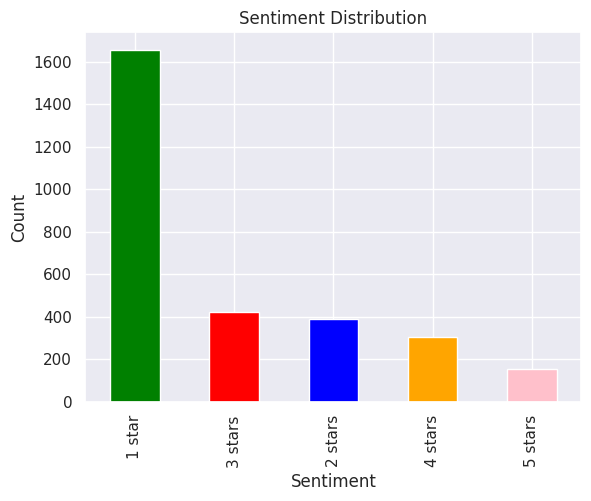

In [25]:
import matplotlib.pyplot as plt

# Plot the distribution
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue','orange','pink'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 1 star is the mazimum occured sentiment more then 1600
# 3 star is the 2nd hgighest  with the value above 400
# 2 star is at 3rd position with value close to 400
# 4 star is at 4th position with value near 300
# 5 star is the least occured with the value less then 200

**now trying different bert model distilbert-base-uncased-finetuned-sst-2-english :it gives us positive and negative label , we dont have to create a seperate mapping function for it**

In [66]:
from transformers import pipeline

nlp = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

sentiments = []
for review in british_airways_data['cleaned_reviews']:
    result = nlp(review)[0]
    sentiments.append(result['label'])

# Added the sentiment_data_pn as a new column to the DataFrame
british_airways_data['sentiment_data_pn'] = sentiments

# viewed the first few rows with sentiment
print(british_airways_data[['cleaned_reviews', 'sentiment_data_pn']].head())


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

                                     cleaned_reviews sentiment_data_pn
0  trip verified first time flying ba business cl...          POSITIVE
1  verified buy sandwich crisp dont expect hot me...          NEGATIVE
2  trip verified twoforone review covering econom...          NEGATIVE
3  trip verified absolutely horrible airline comm...          NEGATIVE
4  trip verified experienced delay cancellation d...          NEGATIVE


In [67]:
# count of each sentiment in sentiment_data_pn
print(british_airways_data['sentiment_data_pn'].value_counts())

NEGATIVE    2336
POSITIVE     594
Name: sentiment_data_pn, dtype: int64


In [68]:
sentiment_distribution_pn = british_airways_data['sentiment_data_pn'].value_counts()

# Display the distribution
print(sentiment_distribution_pn)


NEGATIVE    2336
POSITIVE     594
Name: sentiment_data_pn, dtype: int64


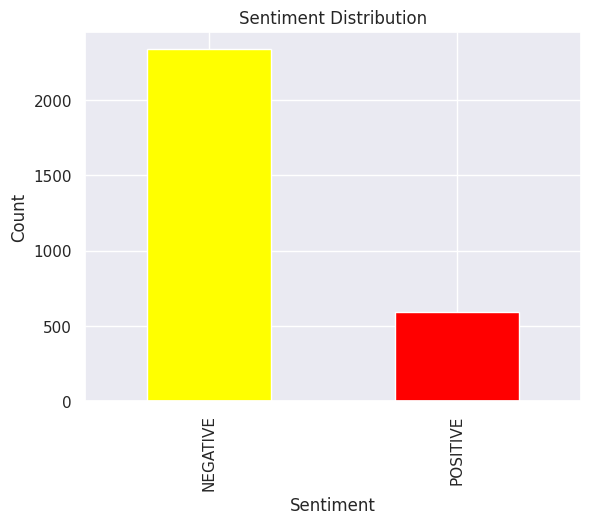

In [39]:
import matplotlib.pyplot as plt

# Plot the distribution
sentiment_distribution_pn.plot(kind='bar', color=['yellow', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


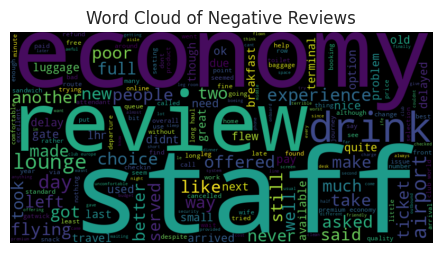

In [53]:
# word  cloud for negative reviews
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Filter the dataset into negative and positive reviews
negative_reviews = british_airways_data[british_airways_data['sentiment_data_pn'] == 'NEGATIVE']['cleaned_reviews']

stopwords = set(stopwords.words('english'))
stopwords.update(["BA","ba", "Heathrow", "meal","customer","flight", "verified", "airline", "would", "check", "british", "Airways", "n't", "Trip",
                         "given", "return", "book", "go", "one", "class", "board", "offer", "time", "get", "However", "Cabin", "could", "passenger",
                         "crew", "food","first","seat","service","good","hour","even","''","plane","’","aircraft","airway","business","london", "back", "told","'s","'" "Review","also", "fly", "bag", "booked", "u", "really", "boarding"])

negative_text = " ".join(review for review in negative_reviews)

negative_wordcloud = WordCloud(width=800, height=400, random_state=42, background_color="black", stopwords=stopwords).generate(negative_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Negative Reviews")
plt.show()


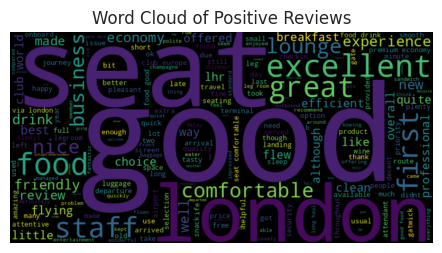

In [54]:
# word cloud for positive reviews
from wordcloud import WordCloud
from nltk.corpus import stopwords

positive_reviews = british_airways_data[british_airways_data['sentiment_data_pn'] == 'POSITIVE']['cleaned_reviews']

stopwords = set(stopwords.words('english'))
stopwords.update(["BA","ba", "Heathrow", "meal","customer","flight", "verified", "airline", "would", "check", "british", "Airways", "n't", "Trip",
                         "given", "return", "book", "go", "one", "class", "board", "offer", "time", "get", "However", "Cabin", "could", "passenger",
                         "crew", "service","airway","hour","even","''","plane","’","aircraft", "back", "told","'s","'" "Review","also", "fly", "bag", "booked", "u", "really", "boarding"])


positive_text = " ".join(review for review in positive_reviews)

positive_wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='black', stopwords=stopwords).generate(positive_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")

plt.show()


######Among these 3 models and textblob we used the "sentiment_data_pn" column for testing and the model is : model="distilbert-base-uncased-finetuned-sst-2-english" as it divdes the data into poistive and negative review ; we dont have to seperately create a function to converge the labels into postive and negative and the result doesnt seemed biased in comparison to other as in the  model: bert-based encoder we got mostly neurtral values and the other model gives us ratings , rating is also good but positive and negative sentimentans would be more useful in this scenario

In [35]:
# testing the selected model : model="distilbert-base-uncased-finetuned-sst-2-english"
# now we got sentimental data : dividing the data into train test and then evaluating the model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# X will be the 'cleaned_reviews' and y will be the 'sentiment_data_pn' labels generated by BERT
X = british_airways_data['cleaned_reviews']
y = british_airways_data['sentiment_data_pn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict the sentiments on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# what does the output tells us ?

Accuracy: 0.7901023890784983

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.79      1.00      0.88       463
    POSITIVE       0.00      0.00      0.00       123

    accuracy                           0.79       586
   macro avg       0.40      0.50      0.44       586
weighted avg       0.62      0.79      0.70       586



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The **accuracy** of the model is approximately 79%. This means that for about 79% of the test set, the model correctly predicted the sentiment of the reviews.

This **average** takes the imbalance of the classes into account. It gives a higher weight to the 'NEGATIVE' class because there are more 'NEGATIVE' instances. The weighted average precision, recall, and F1-score are 62%, 79%, and 70%, respectively.

The model is very good at identifying negative reviews but fails to identify positive reviews as per the scores . This suggests a significant bias towards predicting negative sentiment, which might be due to class imbalance data.

The model's inability to identify positive reviews correctly (indicated by the zero scores for positive precision, recall, and F1-score) : even though we have postive  scenarios in our data but they are less incomparison to the postive the value should not be zero


# however to resolve this problem and get better results we can use balanced data.




**Advantages of Using Pre-trained NLP Models:**
Saves Time and Resources:
Ready-to-Use for Various Tasks:
Robustness and Generalization:

**challanges of Using Pre-trained NLP Models:**

1) bert-base-uncased:The need to convert labels to positive, negative, or neutral adds an additional step in the analysis.

2)distilbert-base-uncased-finetuned-sst-2-english:This model gives positive or negative outputs by default, which works well for clear-cut sentiments but may oversimplify the range of sentiments expressed in customer feedback , if does not give neutral review values  

3)nlptown/bert-base-multilingual-uncased-sentiment:The output in the form of star ratings (1 to 5 stars) hence ,interpreting these ratings can be more complex compared to binary or ternary classifications.

In the context of British Airways reviews, it is important to choose a model that is sensitive to the nuances of customer sentiment in the travel and service industry. The distilbert-based model may be a good starting point due to its fine-tuning on sentiment data, but further customization and fine-tuning with domain-specific data could enhance its performance. Additionally, considering the granular output from the nlptown model may provide deeper insights into customer satisfaction levels.

#Task 3: Review Clustering

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# Vectorizing the text data to perform clustering
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(british_airways_data['cleaned_reviews'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


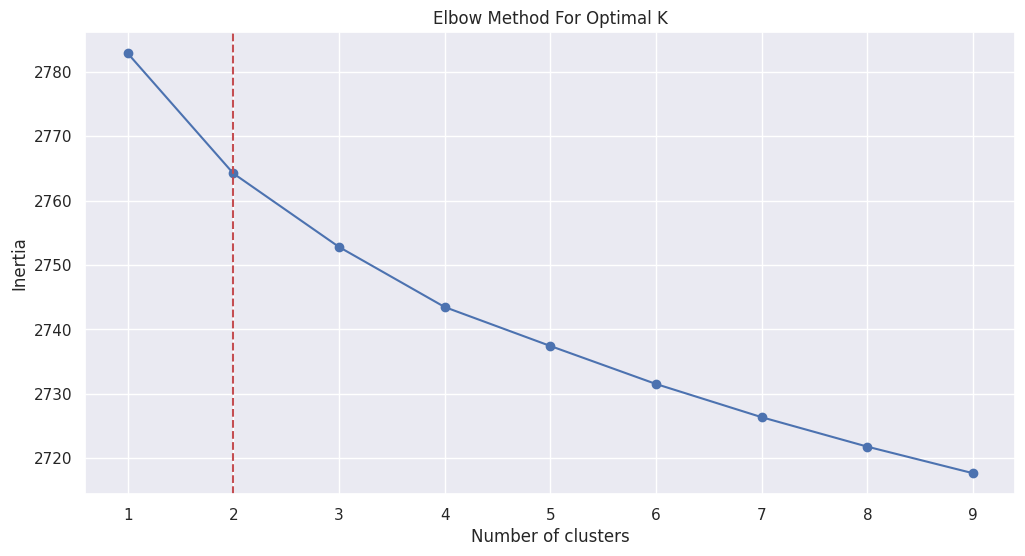

In [28]:
# Trying Elbow and Silouthe to decide the number of clusters
from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt

# Calculating inertia for a range of K values
inertia = []
K_range = range(1, 10)  # Example range, can be adjusted
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.axvline(x=2, color='r', linestyle='--', label='optimal number of clusters')
plt.show()


#####**The plot above represents the variance within the clusters. It decreases as k increases, but it can be seen a bend (or "elbow") at k = 2.However,  In the above plot we can see a sharp bend after 2 which is consistantly decreasing This bend indicates that additional clusters beyond 2 have little value.. so we will consider k=2 as per the elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

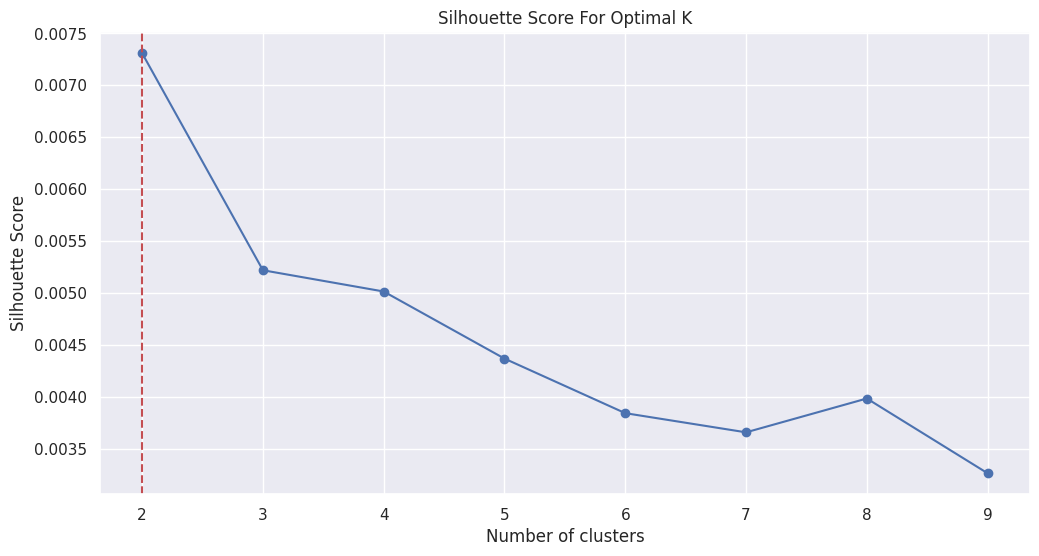

In [29]:
from sklearn.metrics import silhouette_score

# Silhouette score calculation
silhouette_scores = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(12,6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K')
plt.axvline(x=2, color='r', linestyle='--', label='optimal number of clusters')
plt.show()


####As from the graph we can see the cluster number=2 is at max we can use it as it is smaller in size and it covers maximum variance.
####it can be seen a bend at k = 2.Also,  In the above plot we can see a sharp bend after k=2 which is consistantly decreasing This bend indicates that clusters beyond 2 have little value.. so we will consider k=2.

In [54]:
# we can also sacle the data beofre pca , using we do scaling if we have different type of data , to avoid biases : but here we just have
# text data so i think scaling is not required here
# Perform PCA using TruncatedSVD on the data : not sure if it is uselful here becuase pca mostly should be done for dimension reduction
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=2)
X_pca = pca.fit_transform(X)


In [42]:
pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=06a08a8403a5c2fb4f57df4c2d7618639888540b298155b7decd23e4003e1137
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [44]:
# gap statistic for optimal number of clusters
from gap_statistic import OptimalK
import numpy as np

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(X_pca, cluster_array=np.arange(1, 11))
print("Optimal number of clusters:", n_clusters)
#gap statistics suggest 3 as the optimal number of clusters

Optimal number of clusters: 3


# chosen number of clusters are K-2

In [61]:
# Performing k-means clustering
from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 2  # for example

# Create and fit the model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

# Assign the cluster labels to each review
british_airways_data['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
british_airways_data.head()

,Unnamed: 0,title,reviews,date,place,cleaned_reviews,sentiment,cluster
0,0,"""no boarding drinks provided""",✅ Trip Verified | First time flying with BA b...,25th June 2023,United Kingdom,trip verified first time flying ba business cl...,Positive,0
1,1,"""WiFi didn't work""",Not Verified | You can buy sandwiches and cris...,24th June 2023,United Kingdom,verified buy sandwich crisp dont expect hot me...,Positive,0
2,2,"""stick with economy""",✅ Trip Verified | This is a two-for-one revie...,24th June 2023,United Kingdom,trip verified twoforone review covering econom...,Positive,1
3,3,"""Communication is terrible""",✅ Trip Verified | Absolutely horrible airline....,23rd June 2023,United States,trip verified absolutely horrible airline comm...,Negative,0
4,4,"""delays and cancellations""",✅ Trip Verified | Having experienced delays a...,22nd June 2023,United States,trip verified experienced delay cancellation d...,Positive,0


In [63]:
# Optionally, examine cluster contents
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(british_airways_data[british_airways_data['cluster'] == i]['cleaned_reviews'].head(), "\n")


Cluster 0:
0    trip verified first time flying ba business cl...
1    verified buy sandwich crisp dont expect hot me...
3    trip verified absolutely horrible airline comm...
4    trip verified experienced delay cancellation d...
5    trip verified travelled heathrow kalamata retu...
Name: cleaned_reviews, dtype: object 

Cluster 1:
2     trip verified twoforone review covering econom...
7     verified beware british airway marketing make ...
11    trip verified flight dub lcy cancelled pm nigh...
15    trip verified booked first country trip take h...
17    verified may flew seattle heathrow edinburgh b...
Name: cleaned_reviews, dtype: object 



In [64]:
### Evaluating Clustering Algorithms
# X is the cleaned_reviews which we converted into numeric format using TFIDF
# x_pca is the data after performing pca

for i in range(num_clusters):
    kmeans1 = KMeans(n_clusters=(i+2)).fit(X)
    print(silhouette_score(X_pca,kmeans1.labels_),'-',i+2,' Clusters','\n')
# we have to take (i+2 becuase if we dont we get this error
# if we take just i as index starts from 0 it says it must be int value and gives error
#: if we take 1 : then it gives error : Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive))
# hence we take i+2
# and we get 2,3 as the clusters and the scores respectively

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.502381445930371 - 2  Clusters 



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.4645731484275965 - 3  Clusters 



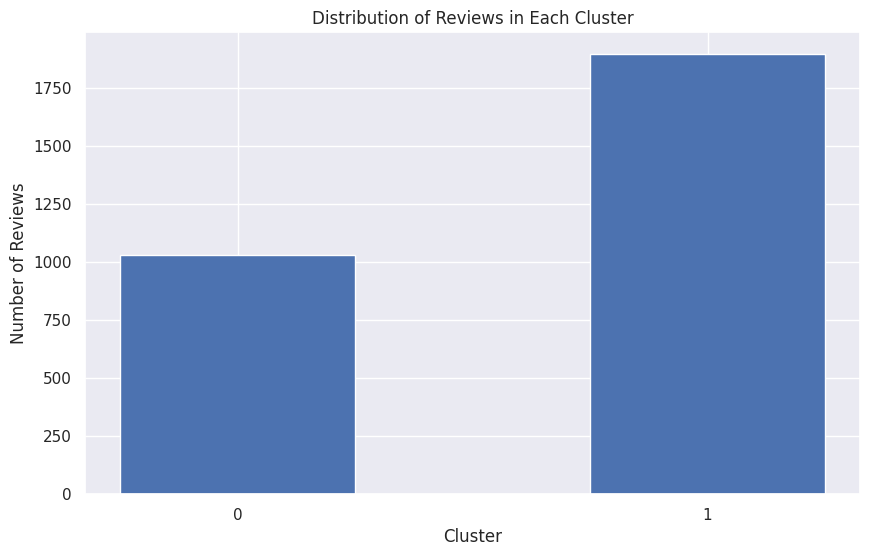

In [38]:
# Plotting the distribution of clusters
plt.figure(figsize=(10, 6))
plt.hist(british_airways_data['cluster'], bins=range(num_clusters+1), align='left', rwidth=0.5)
plt.xticks(range(num_clusters))
plt.xlabel('Cluster')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews in Each Cluster')
plt.show()

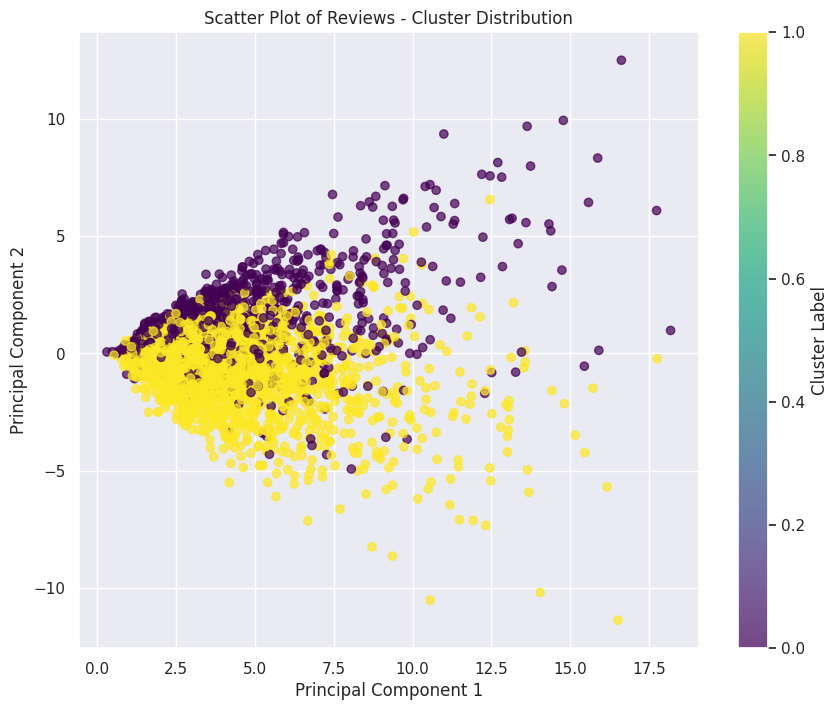

In [55]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=british_airways_data['cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.title('Scatter Plot of Reviews - Cluster Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

Reviews in Cluster 0 might represent a common theme or shared opinions among a larger customer base.
Reviews in Cluster 1 might represent more unique or varied experiences.
The overlap might represent reviews that share characteristics of both clusters.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# CountVectorizer to count word frequencies
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(british_airways_data['cleaned_reviews'])
terms = vectorizer.get_feature_names_out()

# Compute the centroid of each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Number of top terms to display per cluster
n_top_terms = 10

# Displaying the top terms per cluster
for i in range(num_clusters):
    print(f"Cluster {i} top terms:")
    for ind in order_centroids[i, :n_top_terms]:
        print(terms[ind], end=', ')
    print('\n')


Cluster 0 top terms:
flight, ba, hour, customer, airway, british, service, airline, verified, london, 

Cluster 1 top terms:
flight, seat, ba, good, crew, food, class, cabin, service, business, 



**Cluster 0**
This cluster appears to focus on the operational aspects and customer service experiences
**Operational Terms**: Words like "flight," "hour," and "airline" suggest that reviews in this cluster discuss the logistics and timing of flights.
**Customer Service**: The presence of "customer" and "service" indicates discussions around customer service experiences.
**Airline-Specific Terms**: "Ba" (British Airways), "airway," and "british" show that the reviews are specifically about the airline and not general air travel.
**Verified Experiences**: The term "verified" could imply that the reviews are from verified customers, which may lend additional credibility to the sentiments expressed.
**Geographical Mention**: "London" suggests that many reviews may be discussing flights to or from London, a major hub for British Airways.

**Cluster 1**
This cluster seems to be more focused on the in-flight experience and comfort:
**In-Flight Features**: Terms like "seat," "crew," "food," "class," and "cabin" indicate that this cluster's reviews are discussing the in-flight experience, including seating comfort, crew service, meal quality, and class of service (e.g., business class).
**Quality and Comfort**: The word "good" suggests that the reviews are mentioning positive aspects or approval of the services provided.
**Service Quality**: "Service" appears again, which indicates a focus on service quality but, in this context, it might be more specific to the in-flight experience rather than broader customer service.
**Business Travel**: The presence of "business" could mean that reviews frequently mention business class service, which is a key interest for business travelers looking for comfort and amenities.
Interpretation and Business Insights

***Cluster 0*** is potentially highlighting areas where improvements are needed, such as reducing delays ("hour"), improving customer service interactions, and perhaps managing expectations for flights, especially those related to or from London.

***Cluster 1*** is likely capturing more positive aspects of flying with British Airways, particularly praising the in-flight experience and comfort. This cluster could be reflecting the sentiments of a more premium segment of customers, such as business class travelers.

Performing Hierarichal clustering

In [58]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

n_clusters = 2
hclust = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
hclust_labels = hclust.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


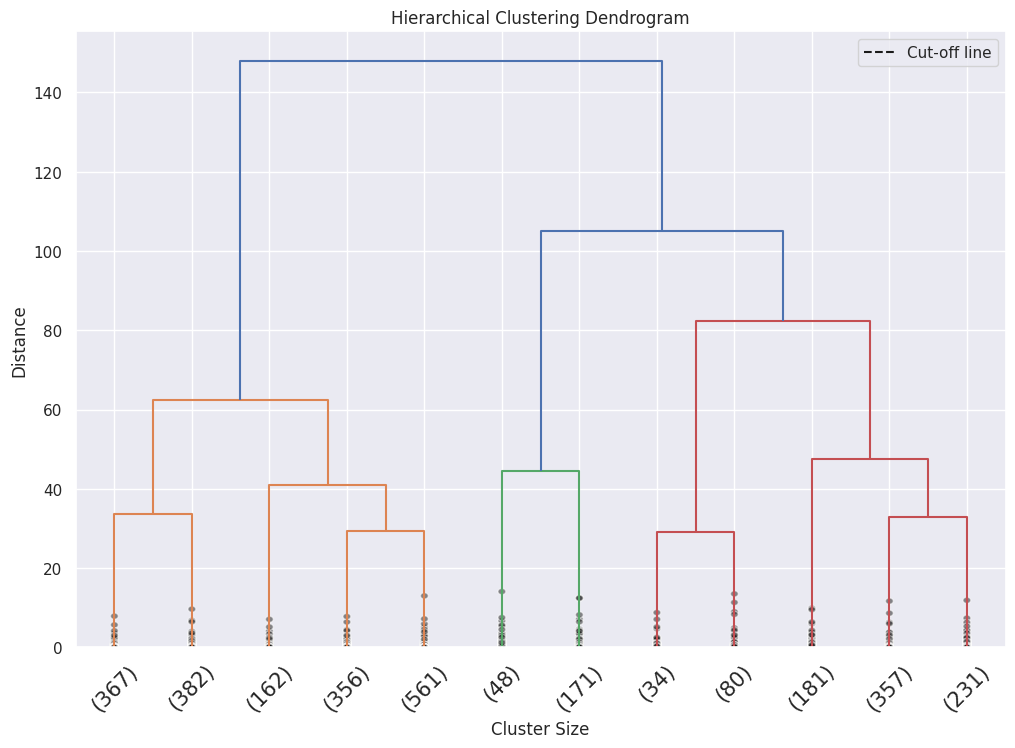

In [60]:
#Plotting the dengogram after hierarical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate the linkage matrix
Z = linkage(X_pca, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# This line is optional and will annotate the distance threshold for cutting the dendrogram
plt.axhline(y=500, c='k', linestyle='--', label='Cut-off line')
plt.legend()

plt.show()

#####The height of the merges indicates the distance at which clusters are combined. Higher merges represent larger distances and suggest less similarity between clusters being merged.

#####The numbers in at the bottom of the dendrogram represent the sizes of the clusters at the points where the cut-off line would intersect the dendrogram. For example, "(367)" indicates that the corresponding vertical line below that point contains 367 reviews that form a cluster.

#####clusters that merge at a lower height are more similar to each other than those that merge higher up.

**The choice of which clustering is better depends on what you want to do with the data? **

**K-Means** might be preferred for its simplicity and efficiency, especially if you have a large number of reviews and desire a clear partitioning of data into distinct groups.
**Hierarchical clustering** might be preferred for its ability to reveal the intrinsic structure of the data without needing to predefine the number of clusters. It is also useful if you want to examine the data at different levels of granularity.
In the context of customer reviews for birtish_airline_data, if we are interested in a quick and clear segmentation of feedback into a few broad categories, K-Means would be beneficial. On the other hand, if you aim to understand relationships between different pieces of feedback and explore the data in a more exploratory manner, Hierarchical clustering would be more appropriate.

***For this analysis i would go with K-means  ***

***Challanges*** could be:K-Means requires you to specify the number of clusters in advance.
Senstive to outliers the result will get affected if the data has  outliers
Outliers can skew the centroids of K-Means clusters, leading to less accurate clustering. Preprocessing data to remove outliers would be helpful
K-Means is generally good with large datasets, it can become computationally expensive if the number of features (dimensions) increases.


#**Task 4: Model Evaluation and Comparison**

**Model Comparison:** Sentiment Analysis vs. Clustering

The **sentiment analysis** model directly categorizes reviews into sentiments (positive, negative, neutral), which is straightforward and directly applicable for understanding customer opinions.

The **clustering model** groups similar reviews together but doesn’t label them by sentiment. It can uncover themes or topics within the data that might not be strictly sentiment-based.

***Applicability and Usefulness:***
Sentiment analysis is more useful for a quick, high-level understanding
of overall customer sentiment.

Clustering is beneficial for deeper data exploration, identifying patterns, trends, or specific areas of concern or praise that might not be evident from a simple sentiment analysis.


**CONCLUSION:**
Both methods are complementary. Sentiment analysis offers a direct approach to gauging customer sentiment, making it highly practical for immediate business responses. Clustering, on the other hand, provides a macro view of customer feedback, uncovering broader issues or positive aspects that can inform strategic planning.

For a business like British Airways, sentiment analysis can quickly identify areas that are negatively affecting customer sentiment, allowing for rapid response and communication. Meanwhile, clustering can help understand the nuances of customer feedback, guiding long-term improvements and informing areas where the business can differentiate itself.

In a comprehensive customer sentiment analysis strategy, it would be beneficial to use both methods: sentiment analysis to monitor and respond to customer sentiment in real-time, and clustering to conduct in-depth analyses for strategic insights.

In [69]:
#correlations between sentiment scores and cluster labels.

# Assuming 'sentiment_data' is the column with sentiment analysis results
# and 'cluster' is the column with cluster labels
crosstab = pd.crosstab(british_airways_data['sentiment_data_pn'], british_airways_data['cluster'])
print(crosstab)


cluster               0    1
sentiment_data_pn           
NEGATIVE           1720  616
POSITIVE            536   58


**Cluster 0**
Contains a majority of Negative reviews (1720) compared to Positive reviews (536).
The number of Negative reviews is significantly higher than the number of Positive reviews, suggesting that this cluster predominantly captures negative sentiments.

**Cluster 1**
Also contains more Negative reviews (616) than Positive reviews (58), but the disparity is even greater than in Cluster 0.
This cluster has a very small number of Positive reviews, indicating it might be strongly associated with negative customer experiences or specific issues that are overwhelmingly perceived negatively.

**Correlation**
There seems to be a correlation where both clusters are more likely to contain Negative reviews, but Cluster 1 is particularly skewed towards negative sentiment. This could mean that Cluster 1 represents reviews about more universally negative experiences or aspects of service.

The relatively higher number of Positive reviews in Cluster 0 could suggest that this cluster includes a mix of general feedback or covers areas where the sentiment is more mixed or nuanced.

***Overall Interpretation:***
The distribution suggests that the negative sentiment is more dominant in the dataset or that the clustering algorithm is more inclined to group reviews into negative clusters.

***Insights to be cosidered for futurr***
British Airways could investigate the content of reviews in Cluster 1 to identify specific areas of service that are causing discontent among customers. Since Cluster 1 has a high concentration of negative sentiment, addressing the issues represented in this cluster might lead to significant improvements in customer satisfaction.

Cluster 0, having more Positive reviews, may represent areas where customers have had mixed experiences. Analyzing the positive reviews in this cluster might offer insights into what the airline is doing right and should continue to focus on.


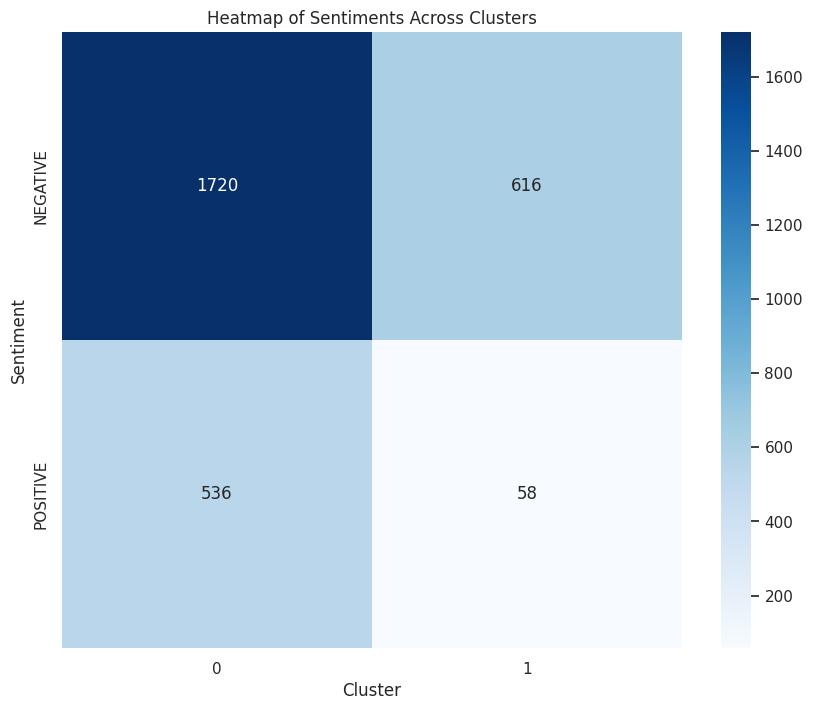

In [70]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, fmt="d", cmap='Blues')
plt.title('Heatmap of Sentiments Across Clusters')
plt.ylabel('Sentiment')
plt.xlabel('Cluster')
plt.show()


**Cluster 0:**
Dominated by a large number of Negative reviews (1720), suggesting that this cluster captures aspects of the airline's service that are predominantly perceived negatively by customers.
Also contains a significant number of Positive reviews (536), indicating that while the cluster is mostly negative, there is a subset of reviews that had a positive sentiment about some aspects of the airline's services.

**Cluster 1:**
Contains a smaller number of Negative reviews (616), but they still outnumber the Positive reviews, which are quite few in this cluster (58).
This cluster, while smaller than Cluster 0, still suggests areas of customer experience that are generally negative but may also represent more specific issues or situations due to the smaller number of reviews.

# ***TASK 5 : Business Insights and Recommendations***

***Key Areas for Improvement:***

**Customer Service:** A significant number of negative reviews suggest that customer service is a key area needing improvement. This includes interactions at check-in, during flights, and post-flight customer support.

**In-Flight Experience:** Terms like "seat," "food," and "crew" from Cluster 1 indicate that passengers have strong opinions about the in-flight experience. Positive sentiments in this cluster can guide what to maintain, while negative sentiments can highlight what to improve.

**Operational Efficiency:** The prevalence of operational terms like "flight" and "hour" in Cluster 0 suggests issues with timeliness, such as delays and long waiting times, which are crucial points of frustration for customers.

***Recommendations:***

**Review In-Flight Services:** Conduct a thorough review of seating comfort, meal quality, and in-flight entertainment based on the feedback to enhance the overall customer experience.

**Improve Communication Protocols:** Develop better communication strategies to keep passengers informed about delays and what is being done to address them.

**Enhance Training for Customer Service Reps:** Implement comprehensive training programs to ensure staff can effectively manage customer expectations and handle complaints gracefully.

**Leverage Positive Feedback:** Use the positive aspects highlighted in Cluster 2 for marketing and promotional activities to reinforce what customers appreciate about the airline.

***Insights for strategic decision-making in the airline industry***

**Insights from Sentiment Analysis**:

Predominantly negative sentiment was detected, with very few positive sentiments identified.

**Immediate Action on Negatives:** The overwhelming number of negative sentiments from the sentiment analysis model suggests an urgent need to address customer service issues. This could mean prioritizing staff training, improving response times, and reviewing policies that impact customer satisfaction.
**Re-evaluate Positive Detection:** The failure to detect positive sentiments may indicate a need to re-evaluate the sentiment analysis approach or to balance the dataset better. British Airways could benefit from a more nuanced model that can capture a range of sentiments, possibly leading to a re-training of the model with a more balanced dataset or a different model that is better at handling class imbalances.

**Insights from Review Clustering**

**Clustering Model Output:**

**Cluster 0**: Dominated by operational terms such as "flight," "hour," "airway," and "london," which indicate concerns with flight operations and potential delays.
**Cluster 1**: Contained terms like "seat," "crew," "food," "class," "cabin," "business," which suggest a focus on the in-flight experience.

**Operational Efficiency**: The prominence of terms related to operations in Cluster 0 indicates that British Airways should consider investing in improving operational efficiency. Strategies could include better flight scheduling, more accurate real-time communication with passengers about delays, and streamlining the boarding process.

**In-Flight Experience Enhancement**: The positive sentiments within Cluster 1, especially around business class and in-flight amenities, highlight areas where customers have had good experiences. These are strengths that British Airways should capitalize on, possibly by promoting their higher-quality in-flight service as a competitive advantage.

**Targeted Service Improvements**: Negative sentiments within Cluster 1 related to seats or food suggest specific in-flight service elements that require attention. For instance, British Airways might explore new seating configurations or menu options.

**Customer Experience Enhancement**: Sentiment analysis can pinpoint specific aspects of the customer service experience that are causing dissatisfaction. Clustering can complement this by grouping similar negative reviews, which can then be used to identify and prioritize areas for improvement. For example, if a cluster of negative reviews frequently mentions check-in and boarding, this could indicate a need for process optimization in those areas.


